Project 
 - topic: Strategy establishment for Africa Ofiicial Development Assistance(ODA)
 - data source: data soruce: 한국수출입은행 ODA 통계(https://stats.koreaexim.go.kr/odastats.html)

# Present Situation & Problem

# Data collection & Analysis

## data collection
* range of year: 2006 - 2018
* unit: 1billion dollars
 1. df_exp
 2. df_type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
from sklearn import linear_model
import pandas_profiling as pr

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 14

In [3]:
pd.options.display.float_format = '{:.2f}'.format


In [4]:
df_2006 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2006.xlsx")
df_2007 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2007.xlsx")
df_2008 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2008.xlsx")
df_2009 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2009.xlsx")
df_2010 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2010.xlsx")
df_2011 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2011.xlsx")
df_2012 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2012.xlsx")
df_2013 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2013.xlsx")
df_2014 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2014.xlsx")
df_2015 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2015.xlsx")
df_2016 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2016.xlsx")
df_2017 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2017.xlsx")
df_2018 = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/total_expense/2018.xlsx")
df_gdp = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/gdp.xlsx")

In [5]:
"""
for문으로 데이터 한번에 읽어와서 concat 시키기
directory = "C:/Users/admin/Desktop/Big_data/DataAnalysis/miniproject(20.08.24~)/africa/data/bank_of_korea/total_expense/"
df = pd.read_excel(directory+str(file[0])+".xlsx")
file = file[1:len(file)+1]
for i in file:
    tmp = pd.read_excel(directory+str(i)+".xlsx")
    df = pd.concat([df,tmp])
df
"""


'\nfor문으로 데이터 한번에 읽어와서 concat 시키기\ndirectory = "C:/Users/admin/Desktop/Big_data/DataAnalysis/miniproject(20.08.24~)/africa/data/bank_of_korea/total_expense/"\ndf = pd.read_excel(directory+str(file[0])+".xlsx")\nfile = file[1:len(file)+1]\nfor i in file:\n    tmp = pd.read_excel(directory+str(i)+".xlsx")\n    df = pd.concat([df,tmp])\ndf\n'

In [6]:
df_exp =  pd.concat([df_2006, df_2007, df_2008, df_2009, df_2010,
                      df_2011, df_2012, df_2013, df_2014,
                      df_2015, df_2016, df_2017, df_2018])

In [7]:
#total expense data (2006-2018)
#unit: 1Billion
df_exp

,기준년도,대륙,지역,수원국,순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,61.54,65.07,79.28,39.83
1,2006,합계,NaN,NaN,61.54,65.07,79.28,39.83
2,2006,아프리카,합계,NaN,61.54,65.07,79.28,39.83
3,2006,아프리카,사하라 이남,합계,39.15,41.24,53.00,15.99
4,2006,아프리카,사하라 이남,가나,0.39,0.39,0.47,0.39
...,...,...,...,...,...,...,...,...
52,2018,아프리카,사하라 이북,알제리,1.61,1.61,4.24,1.61
53,2018,아프리카,사하라 이북,이집트,77.90,77.90,1.82,69.17
54,2018,아프리카,사하라 이북,튀니지,3.22,4.48,63.28,4.48
55,2018,아프리카,아프리카 미배분,합계,9.82,9.82,15.63,9.82


## Aid Expensis Flow

In [8]:
df_exp['수원국'] = df_exp['수원국'].replace('합계', np.nan)
df_exp

,기준년도,대륙,지역,수원국,순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,61.54,65.07,79.28,39.83
1,2006,합계,NaN,NaN,61.54,65.07,79.28,39.83
2,2006,아프리카,합계,NaN,61.54,65.07,79.28,39.83
3,2006,아프리카,사하라 이남,NaN,39.15,41.24,53.00,15.99
4,2006,아프리카,사하라 이남,가나,0.39,0.39,0.47,0.39
...,...,...,...,...,...,...,...,...
52,2018,아프리카,사하라 이북,알제리,1.61,1.61,4.24,1.61
53,2018,아프리카,사하라 이북,이집트,77.90,77.90,1.82,69.17
54,2018,아프리카,사하라 이북,튀니지,3.22,4.48,63.28,4.48
55,2018,아프리카,아프리카 미배분,NaN,9.82,9.82,15.63,9.82


In [9]:
df_exp = df_exp.dropna(axis=0)

In [10]:
df_exp

,기준년도,대륙,지역,수원국,순지출액,총지출액,약정액,증여등가액
4,2006,아프리카,사하라 이남,가나,0.39,0.39,0.47,0.39
5,2006,아프리카,사하라 이남,가봉,0.22,0.22,0.24,0.22
6,2006,아프리카,사하라 이남,감비아,0.04,0.04,0.04,0.04
7,2006,아프리카,사하라 이남,기니,0.05,0.05,0.05,0.05
8,2006,아프리카,사하라 이남,기니비사우,0.03,0.03,0.03,0.03
...,...,...,...,...,...,...,...,...
51,2018,아프리카,사하라 이북,모로코,5.34,5.34,3.51,5.34
52,2018,아프리카,사하라 이북,알제리,1.61,1.61,4.24,1.61
53,2018,아프리카,사하라 이북,이집트,77.90,77.90,1.82,69.17
54,2018,아프리카,사하라 이북,튀니지,3.22,4.48,63.28,4.48


In [11]:
#총지출액 기준 Top7
list_rank7 = df_exp.groupby('수원국').mean().sort_values('총지출액', ascending=False).head(8)
list_rank7 = list_rank7.drop(['아프리카 지역 (미배분)'])
list_rank7

,순지출액,총지출액,약정액,증여등가액
수원국,,,,
탄자니아,38.93,39.09,57.91,23.88
에티오피아,28.13,28.13,64.16,24.85
모잠비크,22.64,22.64,38.07,11.27
세네갈,15.97,15.97,28.33,10.19
가나,14.93,15.72,24.99,12.41
앙골라,14.34,15.11,19.74,4.20
우간다,10.71,10.83,11.96,10.54


No handles with labels found to put in legend.


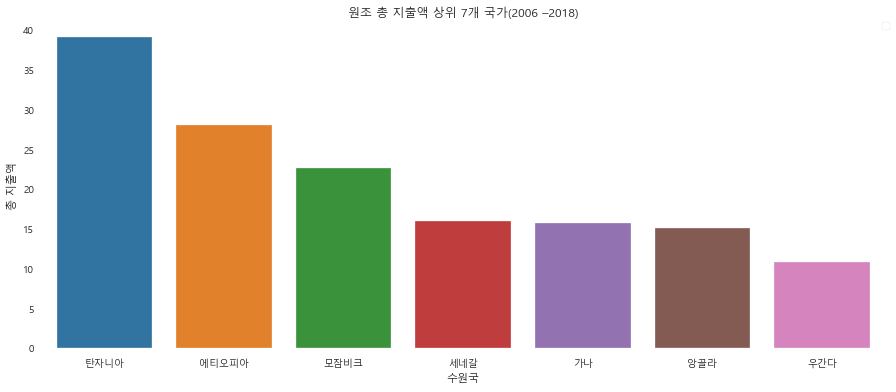

In [12]:
sns.barplot(data=list_rank7, x=list_rank7.index, y='총지출액').set(title= '원조 총 지출액 상위 7개 국가(2006 –2018)', xlabel = '수원국', ylabel = '총 지출액')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [13]:
temp_rank7 = df_exp.groupby(['수원국', '기준년도']).mean()
temp_rank7 = temp_rank7.loc[:,['총지출액']]

In [14]:
temp_rank7

총지출액
수원국 기준년도      
가나  2006  0.39
    2007  1.56
    2008  2.51
    2009  2.47
    2010  6.73
...        ...
튀니지 2014  4.71
    2015  4.85
    2016  5.70
    2017  5.36
    2018  4.48

[636 rows x 1 columns]

In [15]:
rank7 = temp_rank7.loc[list_rank7.index,:]
rank7

총지출액
수원국  기준년도      
탄자니아 2006  3.84
     2007  9.42
     2008  7.15
     2009  9.19
     2010 21.46
...         ...
우간다  2014 12.46
     2015 23.23
     2016 27.98
     2017 29.22
     2018 24.66

[91 rows x 1 columns]

In [16]:
rank7 = rank7.rename(columns = {'총지출액':'Expense'},
                    index={'가나':'GHA', '앙골라':'AGO', '에티오피아':'ETH',
                   '모잠비크':'MOZ', '세네갈':'SEN', '탄자니아':'TZA',
                   '우간다':'UGA'})
rank7.rename_axis(['Country Code', 'Year'])
rank7

Expense
수원국 기준년도         
TZA 2006     3.84
    2007     9.42
    2008     7.15
    2009     9.19
    2010    21.46
...           ...
UGA 2014    12.46
    2015    23.23
    2016    27.98
    2017    29.22
    2018    24.66

[91 rows x 1 columns]

temp_rank7에 국가별 연도별 GDP 추가

In [17]:
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,2390502793.30,2549720670.39,2534636871.51,2701675977.65,2765363128.49,2919553072.63,2965921787.71,3056424581.01,nan,nan
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.11,548888895.56,546666677.78,751111191.11,800000044.44,1006666637.78,...,15856574731.44,17804292964.10,20001598505.70,20561069558.22,20484885119.73,19907111418.99,19362642266.65,20191760000.06,19484384936.63,19101353832.74
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,83799496611.20,111789686464.44,128052853643.11,136709862831.19,145712200312.51,116193649124.15,101123851090.46,122123822333.59,101353230784.59,94635415869.99
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,11926928505.52,12890765324.23,12319830252.48,12776217194.79,13228144008.34,11386846319.16,11861200797.47,13019693450.88,15147020535.39,15278077446.86
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,3449966856.69,3629203786.19,3188808942.57,3193704343.21,3271808157.30,2789870187.51,2896679211.87,3000180750.11,3218316013.23,3154057987.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,5835874320.56,6701698218.26,6499807272.26,7074777526.90,7396705194.63,6442915788.31,6719172016.83,7245707184.82,7942961738.31,7926108374.38
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,...,30906749533.22,32726417212.35,35401341663.04,40415235701.99,43206469767.44,36976204506.07,28084676409.19,24561327989.31,27591261663.29,nan
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7575396972.87,7972996813.99,8497996604.20,9423396234.41,10373995854.55,11334395470.78,...,375349442837.24,416418874936.30,396332702639.50,366829390478.95,350904575292.32,317620522794.83,296357282715.11,349554116683.82,368288939768.32,351431649241.44
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,713000000.00,696285714.29,693142857.14,718714285.71,839428571.43,1082857142.86,...,20265559483.85,23459515275.58,25503060420.03,28045512870.88,27150646908.72,21243347377.32,20954761767.16,25868142076.79,27005238896.17,23064722446.35


In [18]:
temp_gdp = df_gdp.set_index('Country Code')
temp_gdp

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,2390502793.30,2549720670.39,2534636871.51,2701675977.65,2765363128.49,2919553072.63,2965921787.71,3056424581.01,nan,nan
AFG,Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,537777811.11,548888895.56,546666677.78,751111191.11,800000044.44,1006666637.78,1399999966.67,...,15856574731.44,17804292964.10,20001598505.70,20561069558.22,20484885119.73,19907111418.99,19362642266.65,20191760000.06,19484384936.63,19101353832.74
AGO,Angola,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,83799496611.20,111789686464.44,128052853643.11,136709862831.19,145712200312.51,116193649124.15,101123851090.46,122123822333.59,101353230784.59,94635415869.99
ALB,Albania,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,11926928505.52,12890765324.23,12319830252.48,12776217194.79,13228144008.34,11386846319.16,11861200797.47,13019693450.88,15147020535.39,15278077446.86
AND,Andorra,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,3449966856.69,3629203786.19,3188808942.57,3193704343.21,3271808157.30,2789870187.51,2896679211.87,3000180750.11,3218316013.23,3154057987.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,5835874320.56,6701698218.26,6499807272.26,7074777526.90,7396705194.63,6442915788.31,6719172016.83,7245707184.82,7942961738.31,7926108374.38
YEM,"Yemen, Rep.",GDP (current US$),NY.GDP.MKTP.CD,nan,nan,nan,nan,nan,nan,nan,...,30906749533.22,32726417212.35,35401341663.04,40415235701.99,43206469767.44,36976204506.07,28084676409.19,24561327989.31,27591261663.29,nan
ZAF,South Africa,GDP (current US$),NY.GDP.MKTP.CD,7575396972.87,7972996813.99,8497996604.20,9423396234.41,10373995854.55,11334395470.78,12354995062.94,...,375349442837.24,416418874936.30,396332702639.50,366829390478.95,350904575292.32,317620522794.83,296357282715.11,349554116683.82,368288939768.32,351431649241.44


In [19]:
temp_gdp = temp_gdp.loc[['AGO','ETH','GHA','MOZ','SEN','TZA','UGA'], :]
temp_gdp = temp_gdp.loc[:, ['2006', '2007', '2008', '2009', '2010',
                             '2011', '2012', '2013', '2014', '2015',
                             '2016', '2017', '2018']]
temp_gdp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Code,,,,,,,,,,,,,
AGO,52381006892.04,65266452081.39,88538611205.14,70307163678.24,83799496611.20,111789686464.44,128052853643.11,136709862831.19,145712200312.51,116193649124.15,101123851090.46,122123822333.59,101353230784.59
ETH,15280861834.60,19707616772.80,27066912635.22,32437389116.04,29933790334.34,31952763089.33,43310721414.08,47648211133.22,55612228233.52,64589334978.80,74296618481.09,81770791970.98,84269348327.35
GHA,20409668521.55,24758819717.71,28526891010.49,25977847813.74,32197272797.20,39337314809.94,41270954737.25,62405374785.51,53660342159.77,48564863888.44,55009730600.03,58998132329.62,65556464048.15
MOZ,9149485071.34,10423424155.29,12574681497.58,11899763735.41,11087646867.94,14381552432.95,16350804543.05,16974320551.02,17716084107.59,15950969018.95,11936999283.18,13219084261.37,14717223206.90
SEN,11847848224.89,14285970085.14,16949789464.53,16248212852.22,16230887978.50,17902207621.62,17824398468.89,18965572150.29,19797254643.12,17774766636.05,19040312815.13,20996564751.60,23236007428.26
TZA,18649590248.26,21843529024.92,27941177434.51,29081425282.29,32014249841.42,34657139495.40,39650530214.33,45680532613.76,49964788814.09,47378599025.30,49774021003.07,53320625958.56,58001200572.40
UGA,9942597779.99,12292813603.23,14239026629.64,24924179655.58,26457287917.78,27646526401.82,27084639297.08,28681464765.33,32348119639.07,32124730770.81,28967460676.83,30756466548.05,32772824208.95


In [20]:
temp_gdp = temp_gdp.stack()

In [21]:
rank7_gdp = pd.DataFrame(temp_gdp)
rank7_gdp

0
Country Code                    
AGO          2006 52381006892.04
             2007 65266452081.39
             2008 88538611205.14
             2009 70307163678.24
             2010 83799496611.20
...                          ...
UGA          2014 32348119639.07
             2015 32124730770.81
             2016 28967460676.83
             2017 30756466548.05
             2018 32772824208.95

[91 rows x 1 columns]

In [22]:
rank7_gdp.columns = ['GDP']
rank7_gdp

GDP
Country Code                    
AGO          2006 52381006892.04
             2007 65266452081.39
             2008 88538611205.14
             2009 70307163678.24
             2010 83799496611.20
...                          ...
UGA          2014 32348119639.07
             2015 32124730770.81
             2016 28967460676.83
             2017 30756466548.05
             2018 32772824208.95

[91 rows x 1 columns]

In [23]:
rank7_gdp

GDP
Country Code                    
AGO          2006 52381006892.04
             2007 65266452081.39
             2008 88538611205.14
             2009 70307163678.24
             2010 83799496611.20
...                          ...
UGA          2014 32348119639.07
             2015 32124730770.81
             2016 28967460676.83
             2017 30756466548.05
             2018 32772824208.95

[91 rows x 1 columns]

In [24]:
rank7

Expense
수원국 기준년도         
TZA 2006     3.84
    2007     9.42
    2008     7.15
    2009     9.19
    2010    21.46
...           ...
UGA 2014    12.46
    2015    23.23
    2016    27.98
    2017    29.22
    2018    24.66

[91 rows x 1 columns]

In [25]:
top7 = pd.merge(rank7, rank7_gdp, left_on=['수원국', '기준년도'], right_index=True)
top7

Expense            GDP
수원국 기준년도                        
TZA 2006     3.84 18649590248.26
    2007     9.42 21843529024.92
    2008     7.15 27941177434.51
    2009     9.19 29081425282.29
    2010    21.46 32014249841.42
...           ...            ...
UGA 2014    12.46 32348119639.07
    2015    23.23 32124730770.81
    2016    27.98 28967460676.83
    2017    29.22 30756466548.05
    2018    24.66 32772824208.95

[91 rows x 2 columns]

In [26]:
top7.dtypes

Expense    float64
GDP        float64
dtype: object

In [27]:
top7.reset_index(level=('기준년도'), inplace=True)

In [28]:
top7.reset_index(level=('수원국'), inplace=True)

In [29]:
top7

,수원국,기준년도,Expense,GDP
0,TZA,2006,3.84,18649590248.26
1,TZA,2007,9.42,21843529024.92
2,TZA,2008,7.15,27941177434.51
3,TZA,2009,9.19,29081425282.29
4,TZA,2010,21.46,32014249841.42
...,...,...,...,...
86,UGA,2014,12.46,32348119639.07
87,UGA,2015,23.23,32124730770.81
88,UGA,2016,27.98,28967460676.83
89,UGA,2017,29.22,30756466548.05


In [30]:
top7['GDP'] = top7['GDP'] / 1000000000

###Aid Expensis Graph for top 7 countries

In [31]:
top7

,수원국,기준년도,Expense,GDP
0,TZA,2006,3.84,18.65
1,TZA,2007,9.42,21.84
2,TZA,2008,7.15,27.94
3,TZA,2009,9.19,29.08
4,TZA,2010,21.46,32.01
...,...,...,...,...
86,UGA,2014,12.46,32.35
87,UGA,2015,23.23,32.12
88,UGA,2016,27.98,28.97
89,UGA,2017,29.22,30.76


### Top 7 Countries

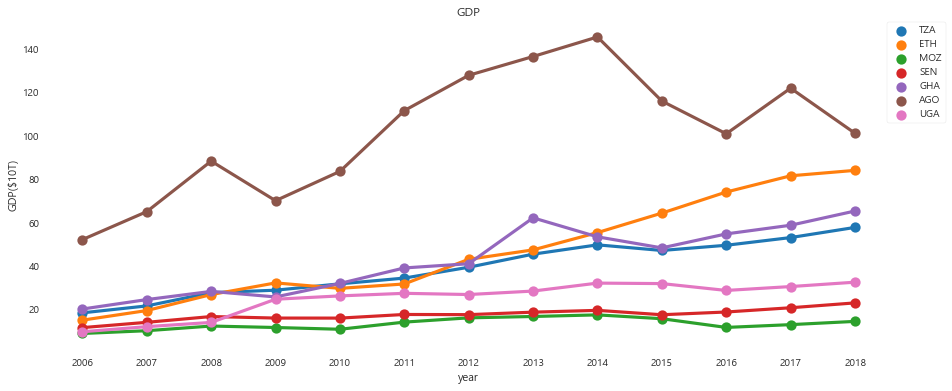

In [32]:
sns.pointplot(data=top7, x='기준년도', y='GDP',ci=None, hue='수원국').set(title= 'GDP', xlabel = 'year', ylabel = 'GDP($10T)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [33]:
top7['GDP'].max()

145.71220031250508

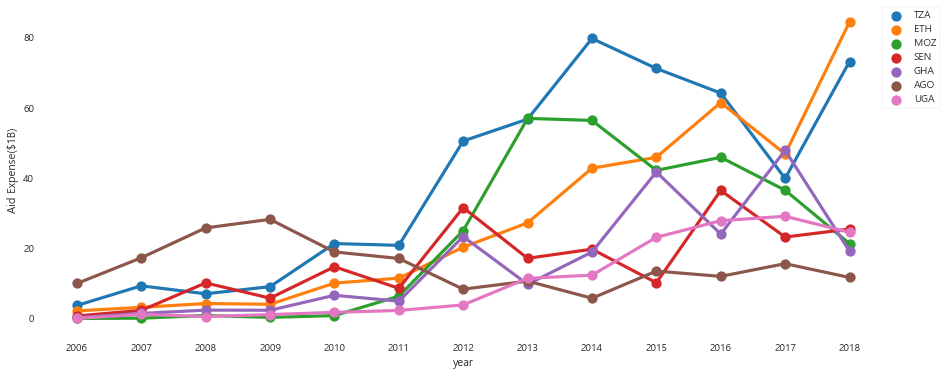

In [34]:
sns.pointplot(data=top7, x='기준년도', y='Expense',ci=None, hue='수원국').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [35]:
top7['Expense'].max()

84.53722762800002

In [36]:
top7

,수원국,기준년도,Expense,GDP
0,TZA,2006,3.84,18.65
1,TZA,2007,9.42,21.84
2,TZA,2008,7.15,27.94
3,TZA,2009,9.19,29.08
4,TZA,2010,21.46,32.01
...,...,...,...,...
86,UGA,2014,12.46,32.35
87,UGA,2015,23.23,32.12
88,UGA,2016,27.98,28.97
89,UGA,2017,29.22,30.76


In [37]:
#ago = top7[top7['수원국'] == 'AGO']
#ago

In [38]:
#ago

In [39]:
df_ago = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/ago.xlsx")
df_eth = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/eth.xlsx")
df_gha = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/gha.xlsx")
df_moz = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/moz.xlsx")
df_sen = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/sen.xlsx")
df_tza = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/tza.xlsx")
df_uga = pd.read_excel("C:/Users/admin/Desktop/Big_data/Projects/2.Africa_Aid_project(20.08.24~)/africa/data/bank_of_korea/by_type/uga.xlsx")

# Data Analysis

## 상위 7개 원조 유형 분석

## 아프리카 주요 7개국 분야별 원조현황

### ANGOLA

#### 양자간 분야별

In [40]:
df_ago

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,186.40,196.45,256.57,54.60
1,2006,합계,NaN,NaN,NaN,10.09,10.09,35.02,0.02
2,2006,-,합계,NaN,NaN,0.01,0.01,35.01,0.01
3,2006,-,-,합계,NaN,0.00,0.00,35.00,0.00
4,2006,-,-,-,합계,0.00,0.00,35.00,0.00
...,...,...,...,...,...,...,...,...,...
324,2018,생산(산업)부문,어업,합계,NaN,0.13,0.62,60.56,0.62
325,2018,생산(산업)부문,어업,수산물 유통지원,합계,-0.49,0.00,60.56,0.00
326,2018,생산(산업)부문,어업,수산물 유통지원,수산물 유통지원,-0.49,0.00,60.56,0.00
327,2018,생산(산업)부문,어업,어업 개발,합계,0.62,0.62,0.00,0.62


In [41]:
temp_ago = df_ago.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_ago = temp_ago.rename(columns = {'분야(대)':'분야'})

temp_ago['분야'] = temp_ago['분야'].replace(['합계', '-'], np.nan)

ago = temp_ago.dropna(axis=0)
ago['총지출액'] = ago['총지출액'] * 1000000

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
ago

,기준년도,분야,총지출액
6,2006,기타 물자지원,11624.00
7,2006,기타 물자지원,11624.00
8,2006,기타 물자지원,11624.00
10,2006,공공행정 및 시민사회,4614.00
11,2006,공공행정 및 시민사회,4614.00
...,...,...,...
324,2018,어업,617685.00
325,2018,어업,0.00
326,2018,어업,0.00
327,2018,어업,617685.00


In [43]:
ago['분야'].unique()

array(['기타 물자지원', '공공행정 및 시민사회', '교육', '농업', '기타 다부문', '통신', '어업',
       '운송 및 창고', '건설', '보건', '에너지', '긴급구호', '공업', '광물자원 및 광업',
       '통상정책 및 규정'], dtype=object)

In [44]:
ago['총지출액'].unique()

array([1.16240000e+04, 4.61400000e+03, 5.54000000e+02, 1.00736900e+07,
       1.14766000e+05, 4.05100000e+03, 6.93950000e+04, 7.15112400e+06,
       0.00000000e+00, 2.29847870e+07, 6.75962100e+06, 1.62251660e+07,
       2.61460000e+04, 1.00001000e+05, 9.94812800e+06, 8.59095000e+05,
       8.46230000e+05, 1.28650000e+04, 7.12800000e+03, 1.74278360e+07,
       5.17666900e+06, 1.22511670e+07, 1.27533000e+05, 4.08100000e+04,
       8.67230000e+04, 1.46843600e+06, 1.46282900e+06, 5.60700000e+03,
       1.39236600e+06, 1.32105700e+06, 1.31961900e+06, 1.43800000e+03,
       7.13090000e+04, 7.83900000e+03, 5.25800000e+03, 1.60486440e+07,
       2.29825600e+06, 1.37503880e+07, 1.49160000e+04, 4.38201700e+06,
       7.04129000e+05, 6.70028000e+05, 6.34808000e+05, 3.52200000e+04,
       3.41010000e+04, 1.21251650e+07, 8.89630000e+06, 3.22886500e+06,
       1.39467400e+06, 7.81240000e+05, 6.26948000e+05, 1.14613000e+05,
       3.96790000e+04, 6.20100000e+06, 3.53170100e+06, 2.66929900e+06,
      

In [45]:
ago['총지출액'] = ago['총지출액'].replace(0, np.nan)
ago['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6      11624.00
7      11624.00
8      11624.00
10      4614.00
11      4614.00
         ...   
324   617685.00
325         nan
326         nan
327   617685.00
328   617685.00
Name: 총지출액, Length: 264, dtype: float64

In [46]:
ago = ago.dropna(axis=0)
ago = ago.drop_duplicates(['기준년도', '분야'], keep='first')
ago

,기준년도,분야,총지출액
6,2006,기타 물자지원,11624.00
10,2006,공공행정 및 시민사회,4614.00
13,2006,교육,554.00
17,2006,농업,10073690.00
25,2007,기타 다부문,114766.00
...,...,...,...
301,2018,기타 다부문,228923.19
305,2018,공공행정 및 시민사회,9342183.71
311,2018,교육,1604097.60
317,2018,운송 및 창고,18402.00


In [47]:
#주요 원조 분야 확인

temp_ago = ago.set_index('분야')
temp_ago

,기준년도,총지출액
분야,,
기타 물자지원,2006,11624.00
공공행정 및 시민사회,2006,4614.00
교육,2006,554.00
농업,2006,10073690.00
기타 다부문,2007,114766.00
...,...,...
기타 다부문,2018,228923.19
공공행정 및 시민사회,2018,9342183.71
교육,2018,1604097.60


In [48]:
ago_top5_field = ago.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
ago_top5_field

,총지출액
분야,
농업,106759711.17
공공행정 및 시민사회,61344456.22
교육,7287467.60
어업,6909123.00
기타 다부문,738279.39


In [49]:
ago_top5_field.index

Index(['농업', '공공행정 및 시민사회', '교육', '어업', '기타 다부문'], dtype='object', name='분야')

In [50]:
ago_top5 = temp_ago.loc[ago_top5_field.index, :]

ago_top5

,기준년도,총지출액
분야,,
농업,2006,10073690.00
농업,2007,7151124.00
농업,2008,22984787.00
농업,2009,17427836.00
농업,2010,16048644.00
농업,2011,12125165.00
농업,2012,6201000.00
농업,2013,10106004.00
농업,2014,3092407.00


In [51]:
ago_top5.reset_index(level=('분야'), inplace=True)

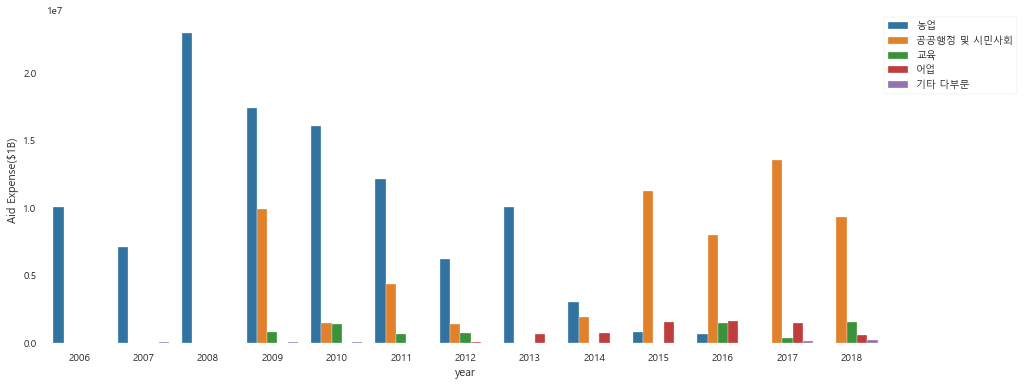

In [52]:
sns.barplot(data=ago_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [53]:
'''ago_corr = ago.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
ago_corr.reset_index(level=('분야'), inplace=True)
ago_corr = ago_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
ago_report = ago_corr.profile_report()
ago_report.to_file('C:/Users/admin/Desktop/ago_report.html')'''

"ago_corr = ago.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\nago_corr.reset_index(level=('분야'), inplace=True)\nago_corr = ago_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\nago_report = ago_corr.profile_report()\nago_report.to_file('C:/Users/admin/Desktop/ago_report.html')"

### ETHIOPIA

#### 양자간 분야별

In [54]:
df_eth

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,365.74,365.74,834.02,323.06
1,2006,합계,NaN,NaN,NaN,2.29,2.29,2.27,2.29
2,2006,-,합계,NaN,NaN,0.23,0.23,0.23,0.23
3,2006,-,-,합계,NaN,0.17,0.17,0.17,0.17
4,2006,-,-,-,합계,0.17,0.17,0.17,0.17
...,...,...,...,...,...,...,...,...,...
1240,2018,생산(산업)부문,농업,축산,합계,0.01,0.01,0.01,0.01
1241,2018,생산(산업)부문,농업,축산,축산,0.01,0.01,0.01,0.01
1242,2018,생산(산업)부문,통상정책 및 규정,합계,NaN,0.04,0.04,0.04,0.04
1243,2018,생산(산업)부문,통상정책 및 규정,통상정책 및 행정관리,합계,0.04,0.04,0.04,0.04


In [55]:
temp_eth = df_eth.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_eth = temp_eth.rename(columns = {'분야(대)':'분야'})

temp_eth['분야'] = temp_eth['분야'].replace(['합계', '-'], np.nan)
temp_eth['분야'].unique()

eth = temp_eth.dropna(axis=0)
eth['총지출액'] = eth['총지출액'] * 1000000

eth

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,기준년도,분야,총지출액
6,2006,기타 다부문,57178.00
7,2006,기타 다부문,57178.00
8,2006,기타 다부문,57178.00
10,2006,공공행정 및 시민사회,130670.00
11,2006,공공행정 및 시민사회,130670.00
...,...,...,...
1240,2018,농업,9448.21
1241,2018,농업,9448.21
1242,2018,통상정책 및 규정,37197.00
1243,2018,통상정책 및 규정,37197.00


In [56]:
eth['분야'].unique()

eth['총지출액'].unique()

eth['총지출액'] = eth['총지출액'].replace(0, np.nan)
eth['총지출액']

eth = eth.dropna(axis=0)

eth = eth.drop_duplicates(['기준년도', '분야'], keep='first')

eth

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,기준년도,분야,총지출액
6,2006,기타 다부문,57178.00
10,2006,공공행정 및 시민사회,130670.00
14,2006,교육,190031.00
22,2006,기타 사회인프라 및 서비스,63767.00
25,2006,보건,563569.00
...,...,...,...
1208,2018,통신,950277.99
1217,2018,건설,206207.00
1220,2018,공업,1235842.91
1229,2018,농업,5255661.97


In [57]:
#주요 원조 분야 확인

temp_eth = eth.set_index('분야')
temp_eth

eth_top5_field = eth.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
eth_top5_field

,총지출액
분야,
운송 및 창고,80887212.61
교육,54922075.13
에너지,39636119.08
보건,38449043.82
농업,25383250.81


In [58]:
eth_top5_field.index

Index(['운송 및 창고', '교육', '에너지', '보건', '농업'], dtype='object', name='분야')

In [59]:
eth_top5 = temp_eth.loc[eth_top5_field.index, :]

eth_top5

,기준년도,총지출액
분야,,
운송 및 창고,2010,23005.00
운송 및 창고,2011,54199.00
운송 및 창고,2012,35715.00
운송 및 창고,2013,121340.00
운송 및 창고,2014,300000.00
운송 및 창고,2015,11800.00
운송 및 창고,2016,28906992.00
운송 및 창고,2017,8362838.08
운송 및 창고,2018,43071323.52


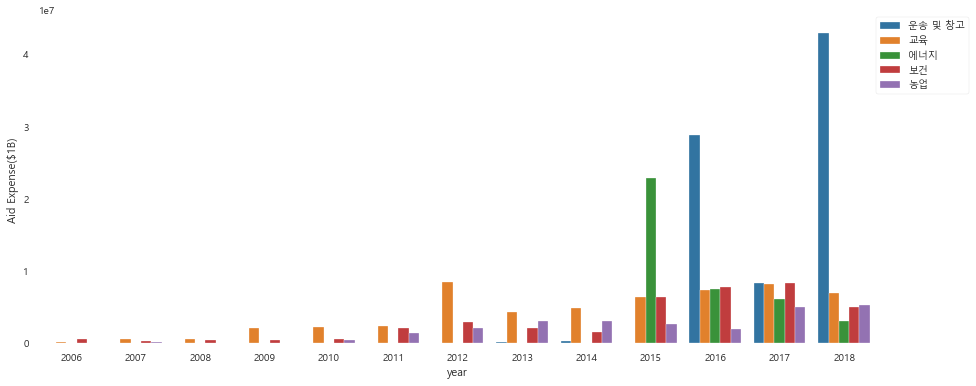

In [60]:
sns.barplot(data=eth_top5, x='기준년도', y='총지출액', hue = eth_top5.index).set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [61]:
'''eth_corr = eth.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
eth_corr.reset_index(level=('분야'), inplace=True)
eth_corr = eth_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
eth_report = eth_corr.profile_report()
eth_report.to_file('C:/Users/admin/Desktop/eth_report.html')'''

"eth_corr = eth.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\neth_corr.reset_index(level=('분야'), inplace=True)\neth_corr = eth_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\neth_report = eth_corr.profile_report()\neth_report.to_file('C:/Users/admin/Desktop/eth_report.html')"

### GHANA

#### 양자간 분야별

In [62]:
df_gha

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,194.09,204.34,324.82,161.36
1,2006,합계,NaN,NaN,NaN,0.39,0.39,0.47,0.39
2,2006,-,합계,NaN,NaN,0.03,0.03,0.03,0.03
3,2006,-,-,합계,NaN,0.03,0.03,0.03,0.03
4,2006,-,-,-,합계,0.03,0.03,0.03,0.03
...,...,...,...,...,...,...,...,...,...
875,2018,생산(산업)부문,어업,어업 개발,합계,0.47,0.47,0.47,0.47
876,2018,생산(산업)부문,어업,어업 개발,어업 개발,0.47,0.47,0.47,0.47
877,2018,생산(산업)부문,통상정책 및 규정,합계,NaN,0.03,0.03,0.03,0.03
878,2018,생산(산업)부문,통상정책 및 규정,통상정책 및 행정관리,합계,0.03,0.03,0.03,0.03


In [63]:
temp_gha = df_gha.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_gha = temp_gha.rename(columns = {'분야(대)':'분야'})

temp_gha['분야'] = temp_gha['분야'].replace(['합계', '-'], np.nan)
temp_gha['분야'].unique()

array([nan, '기타 다부문', '교육', '보건', '통신', '농업', '비배분/비특정', '긴급구호',
       '공공행정 및 시민사회', '운송 및 창고', '인구정책/시책 및 생식보건', '기타 사회인프라 및 서비스', '어업',
       '식수공급 및 위생', '금융 및 재무서비스', '공업', '통상정책 및 규정', '부채관련지원', '환경보호',
       '광물자원 및 광업', '기타 물자지원', '건설', '에너지', '비즈니스 및 기타서비스', '관광'],
      dtype=object)

In [64]:
gha = temp_gha.dropna(axis=0)
gha['총지출액'] = gha['총지출액'] * 1000000

gha

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,분야,총지출액
6,2006,기타 다부문,4453.00
7,2006,기타 다부문,4453.00
8,2006,기타 다부문,4453.00
10,2006,교육,554.00
11,2006,교육,554.00
...,...,...,...
875,2018,어업,472944.41
876,2018,어업,472944.41
877,2018,통상정책 및 규정,32528.00
878,2018,통상정책 및 규정,32528.00


In [65]:
gha['총지출액'].unique()

array([4.45300000e+03, 5.54000000e+02, 1.12551000e+05, 1.74070000e+04,
       9.24100000e+03, 8.16600000e+03, 9.51440000e+04, 1.03322000e+05,
       9.86570000e+04, 4.66500000e+03, 1.92310000e+04, 6.20900000e+03,
       1.30220000e+04, 1.22500000e+05, 4.95050000e+04, 1.18381000e+05,
       4.46990000e+04, 7.53820000e+04, 8.82070000e+04, 1.18773500e+06,
       1.16658000e+06, 2.11550000e+04, 3.22500000e+03, 1.89236000e+05,
       4.99159000e+05, 1.32613000e+05, 3.17602000e+05, 4.89440000e+04,
       2.61630000e+04, 1.15206800e+06, 4.66448000e+05, 3.76994000e+05,
       8.94540000e+04, 6.27668000e+05, 1.30770000e+04, 6.14591000e+05,
       1.86629000e+05, 1.18716800e+06, 1.10997300e+06, 7.71950000e+04,
       1.12100000e+03, 2.79766000e+05, 1.76240000e+04, 2.62142000e+05,
       2.95450000e+04, 3.69300000e+03, 2.58520000e+04, 1.54306000e+05,
       1.18241000e+06, 4.66160000e+04, 1.93943000e+05, 9.41851000e+05,
       1.07946000e+05, 7.46470000e+04, 2.20550000e+04, 1.12440000e+04,
      

In [66]:
gha['총지출액'] = gha['총지출액'].replace(0, np.nan)
gha['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6       4453.00
7       4453.00
8       4453.00
10       554.00
11       554.00
         ...   
875   472944.41
876   472944.41
877    32528.00
878    32528.00
879    32528.00
Name: 총지출액, Length: 788, dtype: float64

In [67]:
gha = gha.dropna(axis=0)

gha = gha.drop_duplicates(['기준년도', '분야'], keep='first')

gha

,기준년도,분야,총지출액
6,2006,기타 다부문,4453.00
10,2006,교육,554.00
13,2006,보건,112551.00
20,2006,통신,103322.00
26,2006,농업,19231.00
...,...,...,...
857,2018,관광,45319.00
860,2018,광물자원 및 광업,14584.00
863,2018,농업,2323759.18
874,2018,어업,472944.41


In [68]:
#주요 원조 분야 확인

temp_gha = gha.set_index('분야')
temp_gha

,기준년도,총지출액
분야,,
기타 다부문,2006,4453.00
교육,2006,554.00
보건,2006,112551.00
통신,2006,103322.00
농업,2006,19231.00
...,...,...
관광,2018,45319.00
광물자원 및 광업,2018,14584.00
농업,2018,2323759.18


In [69]:
gha_top5_field = gha.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
gha_top5_field

,총지출액
분야,
에너지,60725737.64
식수공급 및 위생,55109945.99
보건,23757066.10
교육,15069934.47
농업,13549879.98


In [70]:
gha_top5_field.index

Index(['에너지', '식수공급 및 위생', '보건', '교육', '농업'], dtype='object', name='분야')

In [71]:
gha_top5 = temp_gha.loc[gha_top5_field.index, :]

gha_top5

,기준년도,총지출액
분야,,
에너지,2015,20324776.00
에너지,2016,10186700.00
에너지,2017,23567624.87
에너지,2018,6646636.77
식수공급 및 위생,2010,53372.00
식수공급 및 위생,2011,387567.00
식수공급 및 위생,2012,15283504.00
식수공급 및 위생,2013,529465.00
식수공급 및 위생,2014,6579134.00


In [72]:
gha_top5.reset_index(level=('분야'), inplace=True)

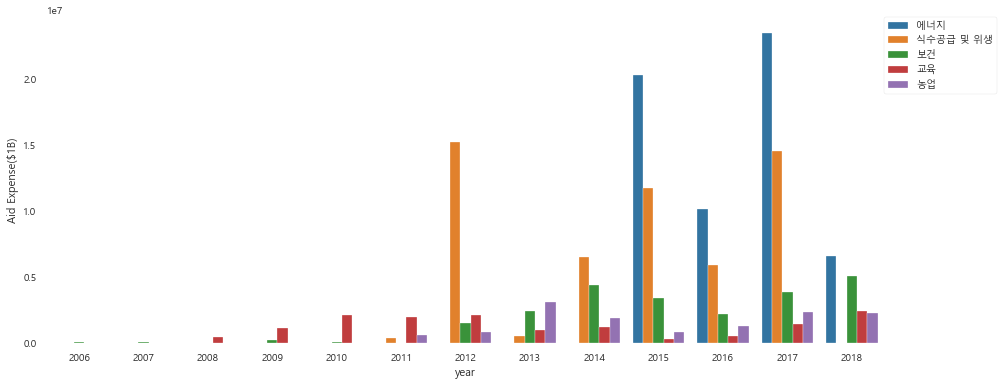

In [73]:
sns.barplot(data=gha_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [74]:
'''gha_corr = gha.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
gha_corr.reset_index(level=('분야'), inplace=True)
gha_corr = gha_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
gha_report = gha_corr.profile_report()
gha_report.to_file('C:/Users/admin/Desktop/gha_report.html')'''

"gha_corr = gha.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\ngha_corr.reset_index(level=('분야'), inplace=True)\ngha_corr = gha_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\ngha_report = gha_corr.profile_report()\ngha_report.to_file('C:/Users/admin/Desktop/gha_report.html')"

### MOZAMBIQ

#### 양자간 분야별

In [75]:
df_moz

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,294.29,294.29,494.86,146.56
1,2006,합계,NaN,NaN,NaN,0.13,0.13,0.13,0.13
2,2006,-,합계,NaN,NaN,0.01,0.01,0.01,0.01
3,2006,-,-,합계,NaN,0.01,0.01,0.01,0.01
4,2006,-,-,-,합계,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...
599,2018,생산(산업)부문,어업,어업 개발,합계,0.04,0.04,0.04,0.04
600,2018,생산(산업)부문,어업,어업 개발,어업 개발,0.04,0.04,0.04,0.04
601,2018,생산(산업)부문,통상정책 및 규정,합계,NaN,0.09,0.09,0.09,0.09
602,2018,생산(산업)부문,통상정책 및 규정,무역진흥,합계,0.09,0.09,0.09,0.09


In [76]:
temp_moz = df_moz.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_moz = temp_moz.rename(columns = {'분야(대)':'분야'})

temp_moz['분야'] = temp_moz['분야'].replace(['합계', '-'], np.nan)
temp_moz['분야'].unique()

array([nan, '교육', '보건', '공업', '농업', '통상정책 및 규정', '통신', '기타 다부문',
       '공공행정 및 시민사회', '금융 및 재무서비스', '기타 사회인프라 및 서비스', '운송 및 창고',
       '식수공급 및 위생', '인구정책/시책 및 생식보건', '광물자원 및 광업', '비즈니스 및 기타서비스', '에너지',
       '건설', '환경보호', '어업'], dtype=object)

In [77]:
moz = temp_moz.dropna(axis=0)
moz['총지출액'] = moz['총지출액'] * 1000000

moz

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,분야,총지출액
7,2006,교육,15672.00
8,2006,교육,15672.00
9,2006,교육,15672.00
10,2006,보건,7623.00
11,2006,보건,7623.00
...,...,...,...
599,2018,어업,35124.00
600,2018,어업,35124.00
601,2018,통상정책 및 규정,89882.00
602,2018,통상정책 및 규정,89882.00


In [78]:
moz['분야'].unique()

array(['교육', '보건', '공업', '농업', '통상정책 및 규정', '통신', '기타 다부문', '공공행정 및 시민사회',
       '금융 및 재무서비스', '기타 사회인프라 및 서비스', '운송 및 창고', '식수공급 및 위생',
       '인구정책/시책 및 생식보건', '광물자원 및 광업', '비즈니스 및 기타서비스', '에너지', '건설', '환경보호',
       '어업'], dtype=object)

In [79]:
moz['총지출액'].unique()

array([1.56720000e+04, 7.62300000e+03, 5.60100000e+03, 8.35900000e+04,
       8.90300000e+03, 9.96090000e+04, 7.84540000e+04, 2.11550000e+04,
       1.09358000e+05, 1.45660000e+05, 3.51100000e+03, 0.00000000e+00,
       1.85886000e+05, 4.44463000e+05, 4.26934000e+05, 1.75290000e+04,
       2.29423000e+05, 1.39140000e+04, 2.15509000e+05, 3.29800000e+03,
       1.12100000e+03, 1.17737000e+05, 2.05849000e+05, 1.27680000e+04,
       5.49000000e+04, 1.14240000e+04, 4.34760000e+04, 6.15464000e+05,
       3.46182000e+05, 2.69282000e+05, 2.71562000e+05, 2.65705000e+05,
       5.85700000e+03, 3.05620000e+04, 2.46230000e+04, 5.93900000e+03,
       1.75740000e+04, 1.27619700e+06, 1.24124400e+06, 3.49530000e+04,
       5.41858000e+05, 2.42339400e+06, 4.55040000e+05, 4.05507000e+05,
       4.95330000e+04, 5.31021000e+05, 2.84224000e+05, 1.10327000e+05,
       1.51039000e+05, 2.28580000e+04, 3.57028000e+05, 1.59509000e+05,
       1.97519000e+05, 1.69986000e+05, 1.67540000e+04, 3.40330000e+04,
      

In [80]:
moz['총지출액'] = moz['총지출액'].replace(0, np.nan)
moz['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7     15672.00
8     15672.00
9     15672.00
10     7623.00
11     7623.00
        ...   
599   35124.00
600   35124.00
601   89882.00
602   89882.00
603   89882.00
Name: 총지출액, Length: 515, dtype: float64

In [81]:
moz = moz.dropna(axis=0)

moz = moz.drop_duplicates(['기준년도', '분야'], keep='first')

moz

,기준년도,분야,총지출액
7,2006,교육,15672.00
10,2006,보건,7623.00
14,2006,공업,5601.00
17,2006,농업,83590.00
20,2006,통상정책 및 규정,8903.00
...,...,...,...
584,2018,운송 및 창고,9615651.54
590,2018,공업,2124.00
593,2018,농업,35957.80
598,2018,어업,35124.00


In [82]:
#주요 원조 분야 확인

temp_moz = moz.set_index('분야')
temp_moz

,기준년도,총지출액
분야,,
교육,2006,15672.00
보건,2006,7623.00
공업,2006,5601.00
농업,2006,83590.00
통상정책 및 규정,2006,8903.00
...,...,...
운송 및 창고,2018,9615651.54
공업,2018,2124.00
농업,2018,35957.80


In [83]:
moz_top5_field = moz.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
moz_top5_field

,총지출액
분야,
보건,73610825.19
운송 및 창고,38670126.14
교육,32382098.86
통신,26301730.87
에너지,15957785.46


In [84]:
moz_top5_field.index

Index(['보건', '운송 및 창고', '교육', '통신', '에너지'], dtype='object', name='분야')

In [85]:
moz_top5 = temp_moz.loc[moz_top5_field.index, :]

moz_top5

,기준년도,총지출액
분야,,
보건,2006,7623.00
보건,2011,1276197.00
보건,2012,16754.00
보건,2013,16265324.00
보건,2014,13608212.00
보건,2015,18064422.00
보건,2016,17758334.00
보건,2017,3919001.56
보건,2018,2694957.62


In [86]:
moz_top5.reset_index(level=('분야'), inplace=True)

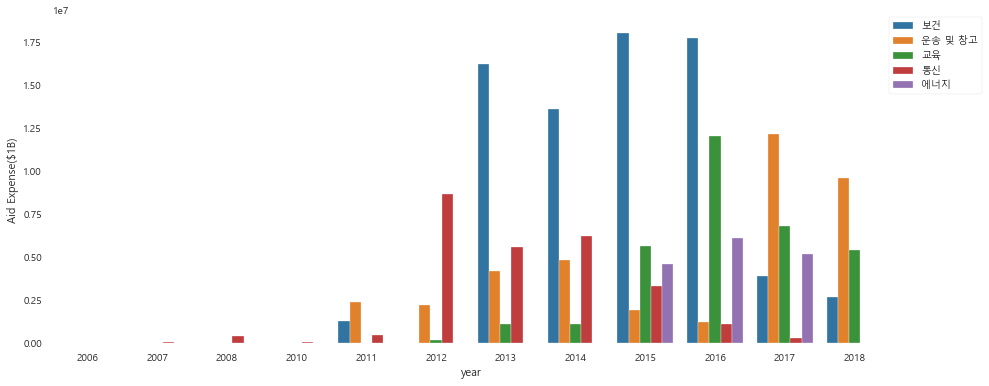

In [87]:
sns.barplot(data=moz_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [88]:
'''moz_corr = moz.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
moz_corr.reset_index(level=('분야'), inplace=True)
moz_corr = moz_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
moz_report = moz_corr.profile_report()
moz_report.to_file('C:/Users/admin/Desktop/moz_report.html')'''

"moz_corr = moz.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\nmoz_corr.reset_index(level=('분야'), inplace=True)\nmoz_corr = moz_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\nmoz_report = moz_corr.profile_report()\nmoz_report.to_file('C:/Users/admin/Desktop/moz_report.html')"

### SENEGAL

#### 양자간 분야별

In [89]:
df_sen

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,207.58,207.58,368.27,132.43
1,2006,합계,NaN,NaN,NaN,0.85,0.85,0.85,0.85
2,2006,-,합계,NaN,NaN,0.07,0.07,0.07,0.07
3,2006,-,-,합계,NaN,0.05,0.05,0.05,0.05
4,2006,-,-,-,합계,0.05,0.05,0.05,0.05
...,...,...,...,...,...,...,...,...,...
928,2018,생산(산업)부문,어업,합계,NaN,0.42,0.42,0.42,0.42
929,2018,생산(산업)부문,어업,어업 개발,합계,0.40,0.40,0.40,0.40
930,2018,생산(산업)부문,어업,어업 개발,어업 개발,0.40,0.40,0.40,0.40
931,2018,생산(산업)부문,어업,어업 교육/훈련,합계,0.02,0.02,0.02,0.02


In [90]:
temp_sen = df_sen.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_sen = temp_sen.rename(columns = {'분야(대)':'분야'})

temp_sen['분야'] = temp_sen['분야'].replace(['합계', '-'], np.nan)
temp_sen['분야'].unique()

array([nan, '환경보호', '공공행정 및 시민사회', '교육', '기타 사회인프라 및 서비스', '보건', '통신',
       '건설', '공업', '농업', '어업', '통상정책 및 규정', '기타 다부문', '인구정책/시책 및 생식보건',
       '관광', '식수공급 및 위생', '비즈니스 및 기타서비스', '운송 및 창고', '비배분/비특정', '기타 물자지원'],
      dtype=object)

In [91]:
sen = temp_sen.dropna(axis=0)
sen['총지출액'] = sen['총지출액'] * 1000000

sen

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,분야,총지출액
6,2006,환경보호,17540.00
7,2006,환경보호,17540.00
8,2006,환경보호,17540.00
10,2006,공공행정 및 시민사회,74003.00
11,2006,공공행정 및 시민사회,74003.00
...,...,...,...
928,2018,어업,418111.16
929,2018,어업,399932.41
930,2018,어업,399932.41
931,2018,어업,18178.75


In [92]:
sen['분야'].unique()

array(['환경보호', '공공행정 및 시민사회', '교육', '기타 사회인프라 및 서비스', '보건', '통신', '건설',
       '공업', '농업', '어업', '통상정책 및 규정', '기타 다부문', '인구정책/시책 및 생식보건', '관광',
       '식수공급 및 위생', '비즈니스 및 기타서비스', '운송 및 창고', '비배분/비특정', '기타 물자지원'],
      dtype=object)

In [93]:
sen['총지출액'].unique()

array([1.75400000e+04, 7.40030000e+04, 1.53739000e+05, 1.01235000e+05,
       1.84630000e+04, 3.40410000e+04, 9.59990000e+04, 1.32701000e+05,
       6.38120000e+04, 6.88890000e+04, 2.84350000e+04, 7.40820000e+04,
       1.48451000e+05, 7.88600000e+03, 1.40565000e+05, 3.19130000e+04,
       2.67050000e+04, 6.17060000e+04, 1.05852000e+05, 3.58961000e+05,
       8.64980000e+04, 2.15227000e+05, 5.72360000e+04, 8.49660000e+04,
       1.96879000e+05, 1.72189000e+05, 2.46900000e+04, 1.38711000e+05,
       1.28133000e+05, 1.05780000e+04, 2.43474000e+05, 1.69574000e+05,
       7.39000000e+04, 8.20193000e+05, 7.70946000e+05, 4.92470000e+04,
       3.81100000e+04, 1.86717000e+05, 5.68086000e+05, 2.93827000e+05,
       4.71290000e+04, 2.46698000e+05, 5.39100000e+04, 2.20349000e+05,
       9.63960000e+04, 1.23953000e+05, 1.11583000e+05, 2.35491000e+05,
       1.93470000e+04, 2.16144000e+05, 1.69912000e+05, 1.34456000e+05,
       3.54560000e+04, 1.45832000e+05, 1.02205900e+06, 4.36440000e+05,
      

In [94]:
sen['총지출액'] = sen['총지출액'].replace(0, np.nan)
sen['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6      17540.00
7      17540.00
8      17540.00
10     74003.00
11     74003.00
         ...   
928   418111.16
929   399932.41
930   399932.41
931    18178.75
932    18178.75
Name: 총지출액, Length: 839, dtype: float64

In [95]:
sen = sen.dropna(axis=0)

sen = sen.drop_duplicates(['기준년도', '분야'], keep='first')

sen

,기준년도,분야,총지출액
6,2006,환경보호,17540.00
10,2006,공공행정 및 시민사회,74003.00
13,2006,교육,153739.00
20,2006,기타 사회인프라 및 서비스,95999.00
23,2006,보건,132701.00
...,...,...,...
905,2018,운송 및 창고,13506547.21
912,2018,통신,494152.00
916,2018,공업,30675.00
919,2018,농업,4829127.00


In [96]:
#주요 원조 분야 확인

temp_sen = sen.set_index('분야')
temp_sen

,기준년도,총지출액
분야,,
환경보호,2006,17540.00
공공행정 및 시민사회,2006,74003.00
교육,2006,153739.00
기타 사회인프라 및 서비스,2006,95999.00
보건,2006,132701.00
...,...,...
운송 및 창고,2018,13506547.21
통신,2018,494152.00
공업,2018,30675.00


In [97]:
sen_top5_field = sen.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
sen_top5_field

,총지출액
분야,
운송 및 창고,106942394.05
교육,20783253.73
농업,18550576.77
공공행정 및 시민사회,18079664.81
식수공급 및 위생,10503204.49


In [98]:
sen_top5_field.index

Index(['운송 및 창고', '교육', '농업', '공공행정 및 시민사회', '식수공급 및 위생'], dtype='object', name='분야')

In [99]:
sen_top5 = temp_sen.loc[sen_top5_field.index, :]

sen_top5

,기준년도,총지출액
분야,,
운송 및 창고,2010,5961.00
운송 및 창고,2011,32150.00
운송 및 창고,2012,26238559.00
운송 및 창고,2013,10976603.00
운송 및 창고,2014,8223698.00
운송 및 창고,2015,3588915.00
운송 및 창고,2016,30773533.00
운송 및 창고,2017,13596427.84
운송 및 창고,2018,13506547.21


In [100]:
sen_top5.reset_index(level=('분야'), inplace=True)

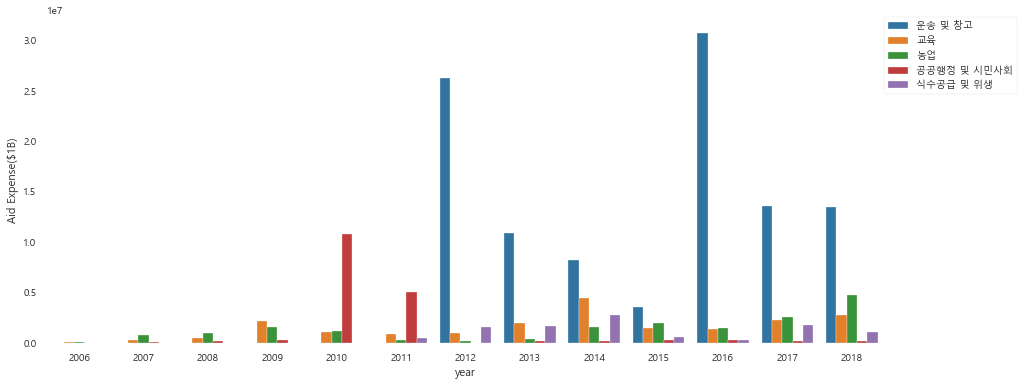

In [101]:
sns.barplot(data=sen_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [102]:
'''sen_corr = sen.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
sen_corr.reset_index(level=('분야'), inplace=True)
sen_corr = sen_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
sen_report = sen_corr.profile_report()
sen_report.to_file('C:/Users/admin/Desktop/sen_report.html')'''

"sen_corr = sen.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\nsen_corr.reset_index(level=('분야'), inplace=True)\nsen_corr = sen_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\nsen_report = sen_corr.profile_report()\nsen_report.to_file('C:/Users/admin/Desktop/sen_report.html')"

### TANZANIA

#### 양자간 분야별

In [103]:
df_tza

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,506.08,508.19,752.84,310.47
1,2006,합계,NaN,NaN,NaN,3.84,3.84,5.80,3.84
2,2006,-,합계,NaN,NaN,0.61,0.61,0.61,0.61
3,2006,-,-,합계,NaN,0.27,0.27,0.27,0.27
4,2006,-,-,-,합계,0.27,0.27,0.27,0.27
...,...,...,...,...,...,...,...,...,...
1282,2018,생산(산업)부문,통상정책 및 규정,합계,NaN,0.07,0.07,6.97,0.07
1283,2018,생산(산업)부문,통상정책 및 규정,무역진흥,합계,0.00,0.00,6.90,0.00
1284,2018,생산(산업)부문,통상정책 및 규정,무역진흥,무역진흥,0.00,0.00,6.90,0.00
1285,2018,생산(산업)부문,통상정책 및 규정,통상정책 및 행정관리,합계,0.07,0.07,0.07,0.07


In [104]:
temp_tza = df_tza.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_tza = temp_tza.rename(columns = {'분야(대)':'분야'})

temp_tza['분야'] = temp_tza['분야'].replace(['합계', '-'], np.nan)
temp_tza['분야'].unique()

array([nan, '긴급구호', '환경보호', '공공행정 및 시민사회', '교육', '기타 사회인프라 및 서비스', '보건',
       '식수공급 및 위생', '통신', '건설', '공업', '농업', '임업', '통상정책 및 규정', '기타 다부문',
       '운송 및 창고', '비즈니스 및 기타서비스', '어업', '인구정책/시책 및 생식보건', '금융 및 재무서비스',
       '비배분/비특정', '에너지', '광물자원 및 광업'], dtype=object)

In [105]:
tza = temp_tza.dropna(axis=0)
tza['총지출액'] = tza['총지출액'] * 1000000

tza

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,분야,총지출액
6,2006,긴급구호,307532.00
7,2006,긴급구호,307532.00
8,2006,긴급구호,307532.00
9,2006,환경보호,31835.00
10,2006,환경보호,7716.00
...,...,...,...
1282,2018,통상정책 및 규정,67390.00
1283,2018,통상정책 및 규정,0.00
1284,2018,통상정책 및 규정,0.00
1285,2018,통상정책 및 규정,67390.00


In [106]:
tza['분야'].unique()

array(['긴급구호', '환경보호', '공공행정 및 시민사회', '교육', '기타 사회인프라 및 서비스', '보건',
       '식수공급 및 위생', '통신', '건설', '공업', '농업', '임업', '통상정책 및 규정', '기타 다부문',
       '운송 및 창고', '비즈니스 및 기타서비스', '어업', '인구정책/시책 및 생식보건', '금융 및 재무서비스',
       '비배분/비특정', '에너지', '광물자원 및 광업'], dtype=object)

In [107]:
tza['총지출액'].unique()

array([3.07532000e+05, 3.18350000e+04, 7.71600000e+03, 2.41190000e+04,
       3.77580000e+04, 9.10896000e+05, 3.61910000e+04, 4.28982000e+05,
       2.90390000e+04, 3.99943000e+05, 4.45723000e+05, 4.09532000e+05,
       2.96430000e+04, 4.41705000e+05, 1.24096000e+05, 1.08573000e+05,
       1.55230000e+04, 3.17609000e+05, 1.22848700e+06, 1.21460600e+06,
       1.38810000e+04, 1.53373000e+05, 1.48679000e+05, 4.69400000e+03,
       3.63280000e+04, 1.20689000e+05, 1.24040000e+04, 4.23380000e+04,
       2.97560000e+04, 1.02597000e+05, 1.67890000e+04, 6.16800000e+03,
       4.85950000e+04, 3.10450000e+04, 1.32112000e+05, 1.25751000e+05,
       6.36100000e+03, 1.17280000e+04, 1.60122000e+05, 8.15360000e+04,
       7.85860000e+04, 6.97375300e+06, 4.71458000e+05, 1.70800200e+06,
       6.86800000e+04, 1.63932200e+06, 4.79429300e+06, 5.90739000e+05,
       4.53735000e+05, 4.03865000e+05, 4.98700000e+04, 1.37004000e+05,
       1.20122000e+05, 1.68820000e+04, 5.14405000e+05, 0.00000000e+00,
      

In [108]:
tza['총지출액'] = tza['총지출액'].replace(0, np.nan)
tza['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6      307532.00
7      307532.00
8      307532.00
9       31835.00
10       7716.00
          ...   
1282    67390.00
1283         nan
1284         nan
1285    67390.00
1286    67390.00
Name: 총지출액, Length: 1189, dtype: float64

In [109]:
tza = tza.dropna(axis=0)

tza = tza.drop_duplicates(['기준년도', '분야'], keep='first')

tza

,기준년도,분야,총지출액
6,2006,긴급구호,307532.00
9,2006,환경보호,31835.00
15,2006,공공행정 및 시민사회,37758.00
18,2006,교육,910896.00
27,2006,기타 사회인프라 및 서비스,29643.00
...,...,...,...
1258,2018,공업,212888.00
1265,2018,광물자원 및 광업,14584.00
1268,2018,농업,19278346.81
1279,2018,어업,858570.00


In [110]:
#주요 원조 분야 확인

temp_tza = tza.set_index('분야')
temp_tza

,기준년도,총지출액
분야,,
긴급구호,2006,307532.00
환경보호,2006,31835.00
공공행정 및 시민사회,2006,37758.00
교육,2006,910896.00
기타 사회인프라 및 서비스,2006,29643.00
...,...,...
공업,2018,212888.00
광물자원 및 광업,2018,14584.00
농업,2018,19278346.81


In [111]:
tza_top5_field = tza.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
tza_top5_field

,총지출액
분야,
보건,111924021.85
운송 및 창고,92956796.12
식수공급 및 위생,50165295.00
에너지,49152552.98
교육,41834628.77


In [112]:
tza_top5_field.index

Index(['보건', '운송 및 창고', '식수공급 및 위생', '에너지', '교육'], dtype='object', name='분야')

In [113]:
tza_top5 = temp_tza.loc[tza_top5_field.index, :]

tza_top5

,기준년도,총지출액
분야,,
보건,2006,441705.00
보건,2007,590739.00
보건,2008,760851.00
보건,2009,2985196.00
보건,2010,2399408.00
보건,2011,2737443.00
보건,2012,2711517.00
보건,2013,16280414.00
보건,2014,14892251.00


In [114]:
tza_top5.reset_index(level=('분야'), inplace=True)

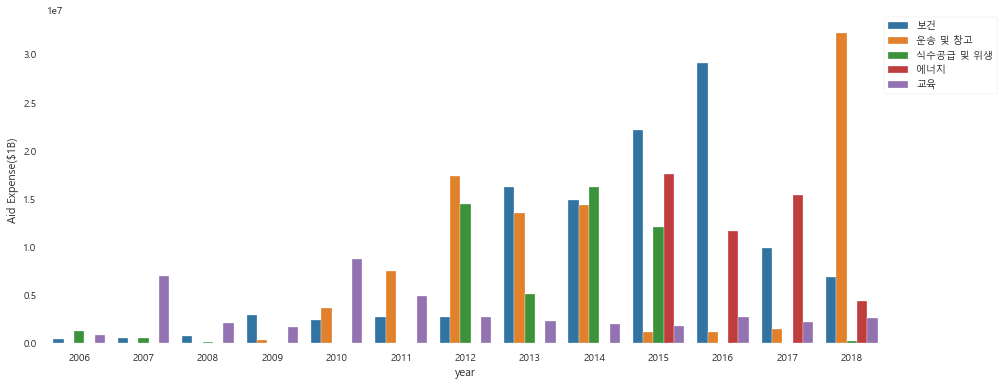

In [115]:
sns.barplot(data=tza_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [116]:
'''tza_corr = tza.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
tza_corr.reset_index(level=('분야'), inplace=True)
tza_corr = tza_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
tza_report = tza_corr.profile_report()
tza_report.to_file('C:/Users/admin/Desktop/tza_report.html')'''

"tza_corr = tza.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\ntza_corr.reset_index(level=('분야'), inplace=True)\ntza_corr = tza_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\ntza_report = tza_corr.profile_report()\ntza_report.to_file('C:/Users/admin/Desktop/tza_report.html')"

### UGANDA

#### 양자간 분야별

In [117]:
df_uga

,기준년도,OECD DAC 분류,분야(대),분야(중),분야(소),순지출액,총지출액,약정액,증여등가액
0,합계,NaN,NaN,NaN,NaN,139.19,140.76,155.49,136.97
1,2006,합계,NaN,NaN,NaN,0.16,0.16,0.16,0.16
2,2006,-,합계,NaN,NaN,0.01,0.01,0.01,0.01
3,2006,-,-,합계,NaN,0.01,0.01,0.01,0.01
4,2006,-,-,-,합계,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...
922,2018,생산(산업)부문,농업,축산,합계,0.03,0.03,0.03,0.03
923,2018,생산(산업)부문,농업,축산,축산,0.03,0.03,0.03,0.03
924,2018,생산(산업)부문,어업,합계,NaN,0.07,0.07,0.07,0.07
925,2018,생산(산업)부문,어업,어업 개발,합계,0.07,0.07,0.07,0.07


In [118]:
temp_uga = df_uga.loc[:, ['기준년도', '분야(대)', '총지출액']]

temp_uga = temp_uga.rename(columns = {'분야(대)':'분야'})

temp_uga['분야'] = temp_uga['분야'].replace(['합계', '-'], np.nan)
temp_uga['분야'].unique()

array([nan, '보건', '농업', '긴급구호', '식수공급 및 위생', '통신', '통상정책 및 규정',
       '공공행정 및 시민사회', '교육', '인구정책/시책 및 생식보건', '기타 다부문', '기타 사회인프라 및 서비스',
       '환경보호', '운송 및 창고', '재건구호', '금융 및 재무서비스', '공업', '광물자원 및 광업', '어업',
       '비즈니스 및 기타서비스', '건설', '에너지'], dtype=object)

In [119]:
uga = temp_uga.dropna(axis=0)
uga['총지출액'] = uga['총지출액'] * 1000000

uga

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,분야,총지출액
7,2006,보건,127357.00
8,2006,보건,127357.00
9,2006,보건,127357.00
11,2006,농업,26011.00
12,2006,농업,26011.00
...,...,...,...
922,2018,농업,26890.62
923,2018,농업,26890.62
924,2018,어업,71629.00
925,2018,어업,71629.00


In [120]:
uga['분야'].unique()

array(['보건', '농업', '긴급구호', '식수공급 및 위생', '통신', '통상정책 및 규정', '공공행정 및 시민사회',
       '교육', '인구정책/시책 및 생식보건', '기타 다부문', '기타 사회인프라 및 서비스', '환경보호',
       '운송 및 창고', '재건구호', '금융 및 재무서비스', '공업', '광물자원 및 광업', '어업',
       '비즈니스 및 기타서비스', '건설', '에너지'], dtype=object)

In [121]:
uga['총지출액'].unique()

array([1.27357000e+05, 2.60110000e+04, 9.80410000e+04, 1.22800000e+05,
       3.43254000e+05, 5.19400000e+04, 1.14271000e+05, 8.00730000e+04,
       2.44780000e+04, 7.15960000e+04, 1.88271000e+05, 2.13800000e+04,
       2.83426000e+05, 1.36565000e+05, 1.46861000e+05, 1.40870000e+04,
       1.59425000e+05, 4.86693000e+05, 3.92495000e+05, 9.41980000e+04,
       1.79054000e+05, 3.77196000e+05, 2.50091000e+05, 1.12529000e+05,
       1.45760000e+04, 6.17590000e+04, 2.69050000e+04, 4.11110000e+04,
       1.70630000e+04, 2.40480000e+04, 7.58800000e+04, 1.84650000e+04,
       5.74150000e+04, 0.00000000e+00, 4.45843000e+05, 4.32751000e+05,
       1.30920000e+04, 2.86790000e+05, 1.48000000e+04, 2.57730000e+04,
       1.99590000e+04, 5.81400000e+03, 3.36200000e+05, 2.41740000e+04,
       3.12026000e+05, 1.65279000e+05, 1.59423000e+05, 1.05571000e+05,
       1.39340000e+04, 2.62570000e+04, 2.65010000e+04, 3.88790000e+04,
       8.63981000e+05, 7.83340000e+04, 6.40200000e+04, 1.60050000e+04,
      

In [122]:
uga['총지출액'] = uga['총지출액'].replace(0, np.nan)
uga['총지출액']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


7     127357.00
8     127357.00
9     127357.00
11     26011.00
12     26011.00
         ...   
922    26890.62
923    26890.62
924    71629.00
925    71629.00
926    71629.00
Name: 총지출액, Length: 831, dtype: float64

In [123]:
uga = uga.dropna(axis=0)

uga = uga.drop_duplicates(['기준년도', '분야'], keep='first')

uga

,기준년도,분야,총지출액
7,2006,보건,127357.00
11,2006,농업,26011.00
19,2007,긴급구호,98041.00
23,2007,보건,122800.00
26,2007,식수공급 및 위생,343254.00
...,...,...,...
885,2018,운송 및 창고,1190328.00
892,2018,통신,171146.00
900,2018,공업,932028.00
909,2018,농업,2622153.73


In [124]:
#주요 원조 분야 확인

temp_uga = uga.set_index('분야')
temp_uga

,기준년도,총지출액
분야,,
보건,2006,127357.00
농업,2006,26011.00
긴급구호,2007,98041.00
보건,2007,122800.00
식수공급 및 위생,2007,343254.00
...,...,...
운송 및 창고,2018,1190328.00
통신,2018,171146.00
공업,2018,932028.00


In [125]:
uga_top5_field = uga.groupby('분야').sum().sort_values('총지출액', ascending=False).head(5)
uga_top5_field

,총지출액
분야,
교육,42426861.09
보건,25236395.28
농업,19123247.25
공업,11764901.00
인구정책/시책 및 생식보건,8275979.07


In [126]:
uga_top5_field.index

Index(['교육', '보건', '농업', '공업', '인구정책/시책 및 생식보건'], dtype='object', name='분야')

In [127]:
uga_top5 = temp_uga.loc[uga_top5_field.index, :]

uga_top5

,기준년도,총지출액
분야,,
교육,2008,24478.00
교육,2009,14087.00
교육,2010,75880.00
교육,2011,863981.00
교육,2012,627099.00
교육,2013,1581996.00
교육,2014,2139738.00
교육,2015,10786160.00
교육,2016,10927869.00


In [128]:
uga_top5.reset_index(level=('분야'), inplace=True)

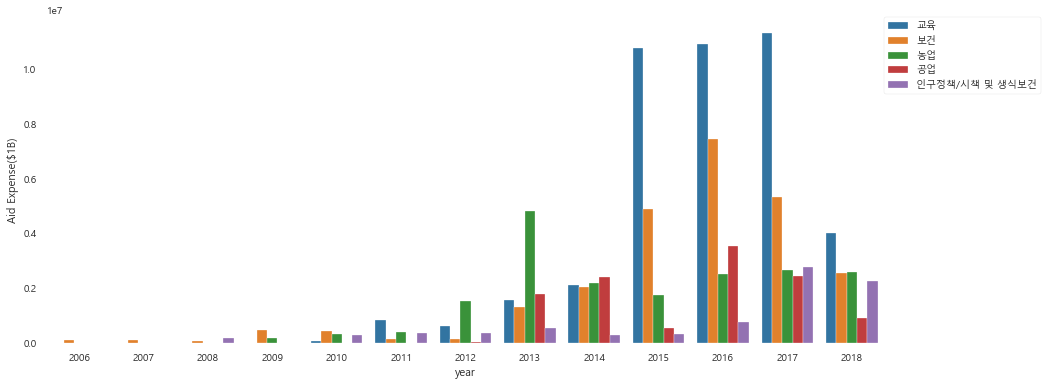

In [129]:
sns.barplot(data=uga_top5, x='기준년도', y='총지출액', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#### 상관관계 분석

In [130]:
"""uga_corr = uga.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)
uga_corr.reset_index(level=('분야'), inplace=True)
uga_corr = uga_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')
uga_report = uga_corr.profile_report()
uga_report.to_file('C:/Users/admin/Desktop/uga_report.html')"""

"uga_corr = uga.groupby(['기준년도','분야']).sum().sort_values('총지출액', ascending=False)\nuga_corr.reset_index(level=('분야'), inplace=True)\nuga_corr = uga_corr.pivot(columns='분야', values='총지출액').dropna(axis=0, how='all')\nuga_report = uga_corr.profile_report()\nuga_report.to_file('C:/Users/admin/Desktop/uga_report.html')"

In [131]:
from matplotlib import font_manager, rc
import platform

In [132]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [133]:
mlt.rcParams['axes.unicode_minus'] = False   


## 분야별 원조현황

In [134]:
'''field_ago = ago.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_eth = eth.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_gha = gha.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_moz = moz.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_sen = sen.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_tza = tza.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_uga = uga.groupby('분야').sum().sort_values('총지출액', ascending=False)


field = pd.concat([field_ago, field_eth, field_gha,
                  field_moz, field_sen, field_tza, field_uga], axis=1)

field = pd.DataFrame(field.sum(axis=1),columns = ['총지출액']).sort_values('총지출액', ascending=False).head(10)

field

# 단위: $1Billion
field['총지출액'] = field['총지출액'] / 1000000

field

field.index

field['총지출액'].values

labels = field.index
titles = ['한국 2006-2018년 아프리카 중점 7개국 대상 원조분야별 비중(%)']
data = field['총지출액'].values
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))


wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"),
                                  pctdistance=0.85,
                                  explode=explode,
                                  startangle= 90)

ax.legend(wedges, labels,
          title="분야",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title(titles)

centre_circle = plt.Circle((0,0), 0.40, color='black', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)'''

'field_ago = ago.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_eth = eth.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_gha = gha.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_moz = moz.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_sen = sen.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_tza = tza.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\nfield_uga = uga.groupby(\'분야\').sum().sort_values(\'총지출액\', ascending=False)\n\n\nfield = pd.concat([field_ago, field_eth, field_gha,\n                  field_moz, field_sen, field_tza, field_uga], axis=1)\n\nfield = pd.DataFrame(field.sum(axis=1),columns = [\'총지출액\']).sort_values(\'총지출액\', ascending=False).head(10)\n\nfield\n\n# 단위: $1Billion\nfield[\'총지출액\'] = field[\'총지출액\'] / 1000000\n\nfield\n\nfield.index\n\nfield[\'총지출액\'].values\n\nlabels = field.index\ntitles = [\'한국 2006-2018년 아프리카 중점 7개국 대상 원조분야별 비중(%)\']\ndata = f

In [135]:
ago

,기준년도,분야,총지출액
6,2006,기타 물자지원,11624.00
10,2006,공공행정 및 시민사회,4614.00
13,2006,교육,554.00
17,2006,농업,10073690.00
25,2007,기타 다부문,114766.00
...,...,...,...
301,2018,기타 다부문,228923.19
305,2018,공공행정 및 시민사회,9342183.71
311,2018,교육,1604097.60
317,2018,운송 및 창고,18402.00


In [136]:
field_ago = ago.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_eth = eth.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_gha = gha.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_moz = moz.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_sen = sen.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_tza = tza.groupby('분야').sum().sort_values('총지출액', ascending=False)
field_uga = uga.groupby('분야').sum().sort_values('총지출액', ascending=False)


field = pd.concat([field_ago, field_eth, field_gha,
                  field_moz, field_sen, field_tza, field_uga], axis=1)

field = pd.DataFrame(field.sum(axis=1),columns = ['총지출액']).sort_values('총지출액', ascending=False).head(7)

In [137]:
# 단위: $1Billion
field['총지출액'] = field['총지출액'] / 1000000

field

,총지출액
운송 및 창고,328.41
보건,277.53
농업,226.78
교육,214.71
에너지,165.76
식수공급 및 위생,137.25
공공행정 및 시민사회,128.68


In [138]:
field.index

Index(['운송 및 창고', '보건', '농업', '교육', '에너지', '식수공급 및 위생', '공공행정 및 시민사회'], dtype='object')

In [139]:
field['총지출액'].values

array([328.40746491, 277.53074223, 226.78353955, 214.70631965,
       165.75891616, 137.24925496, 128.68065512])

In [140]:
labels = field.index

titles = ['한국 2006-2018년 아프리카 중점 7개국 대상 원조분야별 비중(%)']
data = field['총지출액'].values
explode = (0.05, 0.05, 0, 0, 0, 0, 0)

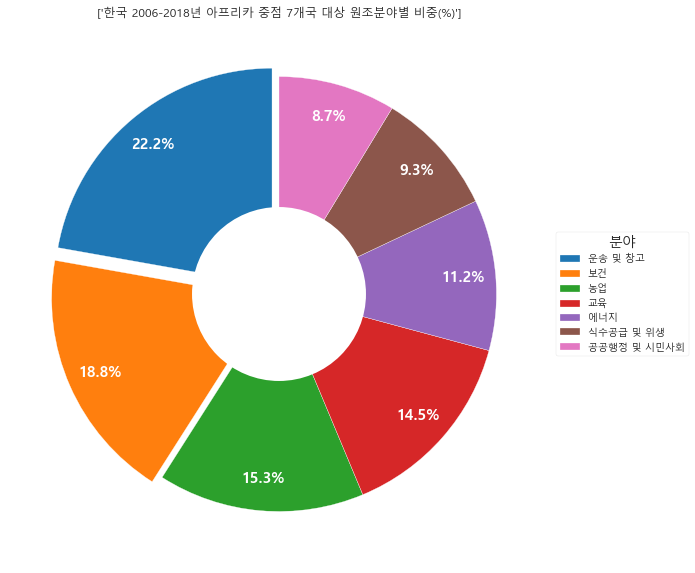

In [141]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"),
                                  pctdistance=0.85,
                                  explode=explode,
                                  startangle= 90)

ax.legend(wedges, labels,
          title="분야",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title(titles)

centre_circle = plt.Circle((0,0), 0.40, color='black', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

In [142]:
ago

,기준년도,분야,총지출액
6,2006,기타 물자지원,11624.00
10,2006,공공행정 및 시민사회,4614.00
13,2006,교육,554.00
17,2006,농업,10073690.00
25,2007,기타 다부문,114766.00
...,...,...,...
301,2018,기타 다부문,228923.19
305,2018,공공행정 및 시민사회,9342183.71
311,2018,교육,1604097.60
317,2018,운송 및 창고,18402.00


In [143]:
temp_ago = ago.set_index(['기준년도', '분야'])
temp_eth = eth.set_index(['기준년도', '분야'])
temp_gha = gha.set_index(['기준년도', '분야'])
temp_moz = moz.set_index(['기준년도', '분야'])
temp_sen = sen.set_index(['기준년도', '분야'])
temp_tza = tza.set_index(['기준년도', '분야'])
temp_uga = uga.set_index(['기준년도', '분야'])

In [144]:
temp_field_top7 = pd.concat([temp_ago, temp_eth, temp_gha, temp_moz, 
                             temp_sen, temp_tza, temp_uga], axis=1)
temp_field_top7['Total'] = temp_field_top7.sum(axis=1)
field_top7 = pd.DataFrame(temp_field_top7['Total'])
field_top7

Total
기준년도 분야                        
2006 건설               180279.00
     공공행정 및 시민사회      247045.00
     공업               540529.00
     교육              1271446.00
     기타 다부문            61631.00
...                         ...
2018 운송 및 창고        99741839.32
     인구정책/시책 및 생식보건  8080747.00
     통상정책 및 규정        226997.00
     통신              2911381.92
     환경보호            1049011.15

[252 rows x 1 columns]

In [145]:
field_top7.reset_index(level=('분야'), inplace=True)
field_top7

,분야,Total
기준년도,,
2006,건설,180279.00
2006,공공행정 및 시민사회,247045.00
2006,공업,540529.00
2006,교육,1271446.00
2006,기타 다부문,61631.00
...,...,...
2018,운송 및 창고,99741839.32
2018,인구정책/시책 및 생식보건,8080747.00
2018,통상정책 및 규정,226997.00


In [146]:
field_top7['분야']

field.index

Index(['운송 및 창고', '보건', '농업', '교육', '에너지', '식수공급 및 위생', '공공행정 및 시민사회'], dtype='object')

In [147]:
field_top7 = field_top7[field_top7['분야'].isin(field.index)].sort_index()
field_top7

,분야,Total
기준년도,,
2006,공공행정 및 시민사회,247045.00
2006,교육,1271446.00
2006,농업,10471447.00
2006,보건,1385506.00
2006,식수공급 및 위생,1498757.00
...,...,...
2018,농업,34345006.49
2018,보건,22437777.32
2018,식수공급 및 위생,4890859.48


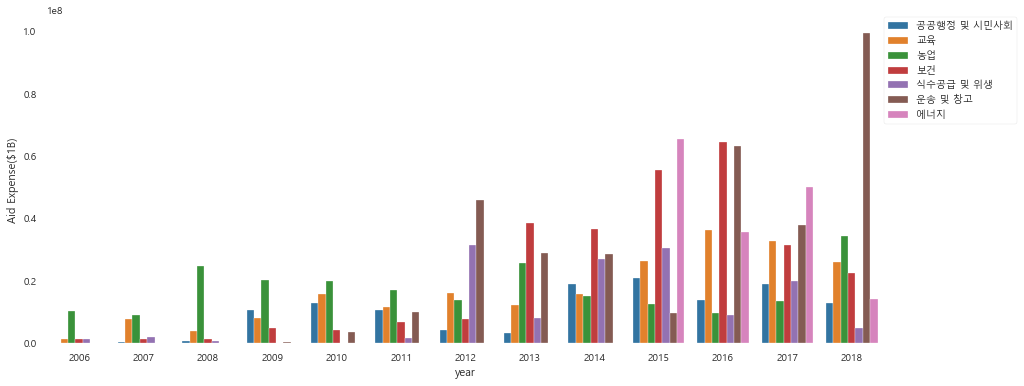

In [148]:
sns.barplot(data=field_top7, x=field_top7.index, y='Total', hue = '분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

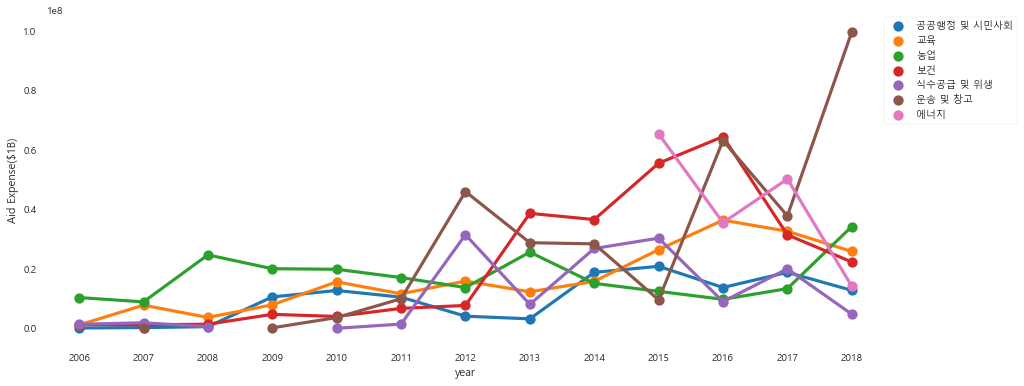

In [152]:
sns.pointplot(data=field_top7, x=field_top7.index, y='Total',ci=None, hue='분야').set(xlabel = 'year', ylabel = 'Aid Expense($1B)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)